# 갭마인더 데이터 집합 불러오기

In [4]:
import pandas as pd
df=pd.read_csv('../data/gapminder.tsv', sep='\t')

# 불러온 데이터 집합 살펴보기
## pandas 와 python의 자료형 (좌:pandas, 우:python)
### object=string=문자열 int(float)64=int=정수(소수점포함숫자) datetime64=datetime=표준라이브러리datetime자료형

In [13]:
print(df.head())
print('\n 구분')
print(type(df))
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.info())


       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

 구분
<class 'pandas.core.frame.DataFrame'>
(1704, 6)
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4

# 열 단위로 데이터 추출하기
# 여러 열을 출력할땐 대괄호 두개씩 주의

In [26]:
country_df=df['country']
print(type(country_df))
print(country_df.tail())
subset_df=df[['country','continent','year']]
print(type(subset_df))
print(subset_df.tail())
print(df.tail())

<class 'pandas.core.series.Series'>
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object
<class 'pandas.core.frame.DataFrame'>
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007
       country continent  year  lifeExp       pop   gdpPercap
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


# loc 속성으로 행 단위 데이터 추출하기
## loc에서 -1은 끝자리 인덱싱이 아니다. 따라서 데이터프레임의 마지막행을 추출하려면 다른개념활용
### file.shape 는 (행의수,열의수) 따라서 file.shape[0] 는 행의수 (데이터형식은 정수)

In [23]:
print(df.loc[0])
print('구분')
print(subset_df.loc[0])
print('구분')
last_row=df.shape[0]
last_rowindex=last_row - 1
print(last_row)
print('구분')
print(df.loc[last_rowindex])



country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object
구분
country      Afghanistan
continent           Asia
year                1952
Name: 0, dtype: object
구분
1704
구분
country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


# tail과 loc는 조금 달라요! 단일 행반환시 Tail자료반환은 데이터프레임

In [24]:
print(df.loc[last_rowindex])
print('\n')
print(df.tail(n=1))

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


# iloc 속성으로 행 단위 데이터 추출하기
## iloc이란 기존 python 개념 , -1로도 인덱싱가능!

In [31]:
print(df.iloc[[0, 9 ,99 ,999]])
print('_____')
print(df.iloc[[1],[1]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
9    Afghanistan      Asia  1997   41.763  22227415   635.341351
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130
_____
  continent
1      Asia


# 파이썬 슬라이싱 구문을 조합하여 원하는 데이터 추출하기
## loc는 "열"지정값에 문자열리스트(열 선택안할시엔 숫자로가능), iloc는 "열"지정값에 정수리스트
### [ 행(리스트형식도가능), 열(리스트형식도가능) ] or [[나열]] 등. 단, [[나열]]은 여러"행"을 추출

In [39]:
subset2_df=df.loc[:,['year','pop']]
print(subset2_df.loc[[1,11,9,99,999]])
subset3_df=df.iloc[:,[2,2,4,-1]]
print(subset3_df.iloc[[1,11,9,99,999]])

     year       pop
1    1957   9240934
11   2007  31889923
9    1997  22227415
99   1967  62821884
999  1967   1149500
     year  year       pop    gdpPercap
1    1957  1957   9240934   820.853030
11   2007  2007  31889923   974.580338
9    1997  1997  22227415   635.341351
99   1967  1967  62821884   721.186086
999  1967  1967   1149500  1226.041130


# iloc 속성과 range 메서드로 원하는 데이터 추출하기

In [47]:
small_range=list(range(5))
print(small_range)
print(type(small_range))
subsetlist_df=df.iloc[:,small_range]
print(subsetlist_df.loc[0])
print("____+_____")
print(subsetlist_df.loc[[0,1,2]])
print("______#_______")
print(subsetlist_df.iloc[[0],[2,3,4]])

[0, 1, 2, 3, 4]
<class 'list'>
country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
Name: 0, dtype: object
____+_____
       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
______#_______
   year  lifeExp      pop
0  1952   28.801  8425333


# 열 지정값에 파이썬 슬라이싱을 사용하여 원하는 데이터 추출하기
## 슬라이싱값 자체를 리스트 변수로 받아 활용

In [65]:
slicing_range=list(range(0,6,2))
print(slicing_range)
sub1=df.iloc[:,slicing_range]
print(sub1.head(n=7))
sub2=df.iloc[:,list(range(0,6,2))]
print(sub2.head(n=6))
sub3=df.iloc[:,2:0:-1]
print(sub3.head())

[0, 2, 4]
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460
5  Afghanistan  1977  14880372
6  Afghanistan  1982  12881816
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460
5  Afghanistan  1977  14880372
   year continent
0  1952      Asia
1  1957      Asia
2  1962      Asia
3  1967      Asia
4  1972      Asia


# loc, iloc 자유자재로 사용하기

In [78]:
print(df.iloc[[0,99,999],[1,2,4]])
print("*****")
print(df.iloc[[0,99,999],[1,2,3]])
print("*****")
print(df.iloc[[0,99,999],:])
print("*****")
print(df.loc[[0,99,999],['continent','year','pop']])
print(df.loc[::100,['continent','year','pop']])
print(range(1,10,2))

    continent  year       pop
0        Asia  1952   8425333
99       Asia  1967  62821884
999      Asia  1967   1149500
*****
    continent  year  lifeExp
0        Asia  1952   28.801
99       Asia  1967   43.453
999      Asia  1967   51.253
*****
         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130
*****
    continent  year       pop
0        Asia  1952   8425333
99       Asia  1967  62821884
999      Asia  1967   1149500
     continent  year        pop
0         Asia  1952    8425333
100       Asia  1972   70759295
200     Africa  1992    8878303
300   Americas  1952   12350771
400     Europe  1972    9862158
500     Africa  1992    3668440
600   Americas  1952    3146381
700       Asia  1972  567000000
800       Asia  1992  124329269
900     Africa  1952    1019729
1000      Asia

# 그룹화한 데이터의 평균 구하기

In [86]:
print(df.groupby('year')['lifeExp'].mean())
#연도별(열의 한요소), lifeExp(다른 열의요소)의 평균을구하기
grouped_year=df.groupby('year')
print(type(grouped_year))
print(grouped_year)
print(grouped_year['lifeExp'])
print(grouped_year['lifeExp'].mean())
print("____+_++_________")
multigrouped_year=df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()
print(multigrouped_year)


year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64
____+_++_________
                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067

# 그룹화한 데이터의 개수 세어보기

In [89]:
print(df.groupby('continent')['country'].nunique())
print(df.groupby(['year','pop'])['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64
year  pop       
1952  60011         1
      63149         1
      120447        1
      147962        1
      153936        1
                   ..
2007  190010647     1
      223547000     1
      301139947     1
      1110396331    1
      1318683096    1
Name: country, Length: 1704, dtype: int64


# 그래프 만들기

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


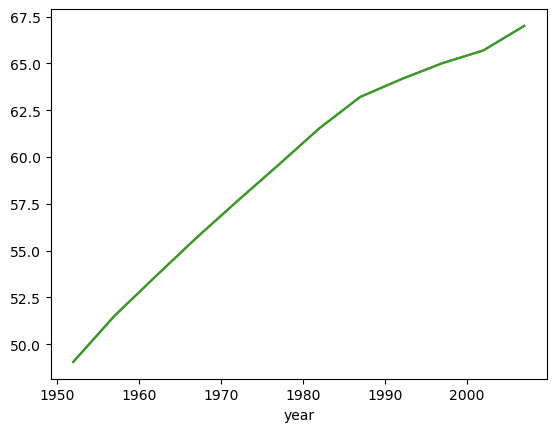

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
global_lifeExp=df.groupby(['year'])['lifeExp'].mean()
print(global_lifeExp)
global_lifeExp.plot()
plt.show()
